In [63]:
# importing use full librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CASE STUDY

***PROBLEM STATMENT*** : Suppose you hired in XYZ Ltd Company. XYZ Ltd have online portal providing data on the global digital economy, industrial sectors, consumer markets, public opinion, media and macroeconomic developments. XYZ have to prepare report about billionaires around the world. They provide you forbes billionaires list 2022 dataset with statistics in which they are interested.

***Question to solve*** 
##### *Who are the Top 10 richest in the world?*
##### *Which country has highest number of billionaires?*
##### *Top ten industries that made highest number of billionaires.*
##### *Gender wise distribution of billionaires*
##### *Top Ten Indian Billionaires*
##### *Age Distribution of Billionaires*
##### *Top Five Young Billionaires and their Net Worth*
##### *Find Relationship between Age and Networth*


In [64]:
#getting data from csv
df = pd.read_csv('forbes_2022_billionaires.csv')
#check the data
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [65]:
#geeting shape of data
df.shape

(2668, 22)

In [66]:
#get more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [67]:
#checking the missing values in data
df.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

In [68]:
#describe the data
df.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000


In [69]:
df1=df.loc[:,['rank','personName','age','finalWorth','country','gender','category','state']]
df1

,rank,personName,age,finalWorth,country,gender,category,state
0,1,Elon Musk,50.0,219000.0,United States,M,Automotive,Texas
1,2,Jeff Bezos,58.0,171000.0,United States,M,Technology,Washington
2,3,Bernard Arnault & family,73.0,158000.0,France,M,Fashion & Retail,NaN
3,4,Bill Gates,66.0,129000.0,United States,M,Technology,Washington
4,5,Warren Buffett,91.0,118000.0,United States,M,Finance & Investments,Nebraska
...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,66.0,1000.0,China,M,Manufacturing,NaN
2664,2578,Zhou Ruxin,59.0,1000.0,China,M,Technology,NaN
2665,2578,Wen Zhou & family,57.0,1000.0,China,M,Manufacturing,NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,China,F,Energy,NaN


In [70]:
df1.describe()

,rank,age,finalWorth
count,2668.000000,2582.000000,2668.000000
mean,1302.919040,64.210689,4762.350075
std,747.807782,13.401258,10540.482258
min,1.000000,19.000000,1000.000000
25%,665.000000,55.000000,1500.000000
50%,1292.000000,64.000000,2400.000000
75%,1929.000000,74.000000,4300.000000
max,2578.000000,100.000000,219000.000000


In [71]:
df1.duplicated().sum()

0

In [72]:
df1.isnull().sum()

rank             0
personName       0
age             86
finalWorth       0
country         13
gender          16
category         0
state         1920
dtype: int64

##### *Who are the Top 10 richest in the world?*

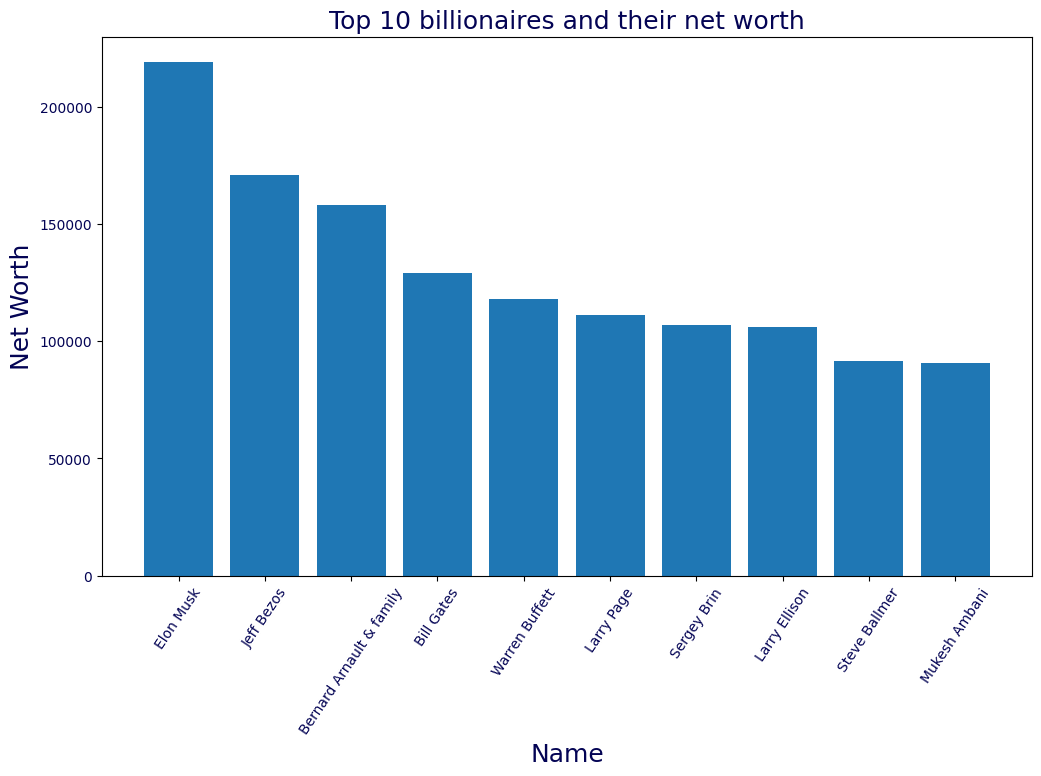

In [73]:
fig=plt.figure(figsize=(12,7))
plt.bar(np.arange(10),df1['finalWorth'][0:10])
plt.xticks(np.arange(10),df1["personName"][0:10],rotation=56,color='#030354')
plt.xlabel("Name",color='#030354',fontsize=18)
plt.ylabel("Net Worth",color='#030354',fontsize=18)
plt.yticks(color='#030354')
plt.title("Top 10 billionaires and their net worth", fontsize = 18,color='#030354')
plt.show()


### *Which country has highest number of billionaires?*

In [74]:
df1['country'].unique()


array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', nan, 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Ireland', 'Bermuda',
       'Lebanon', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Ando

In [75]:
df1['country'].nunique()

73

In [76]:

country_wise_no=df1['country'].value_counts()
country_wise_no


country
United States     748
China             571
India             159
Germany           112
United Kingdom     85
                 ... 
Portugal            1
Georgia             1
Algeria             1
Colombia            1
Andorra             1
Name: count, Length: 73, dtype: int64

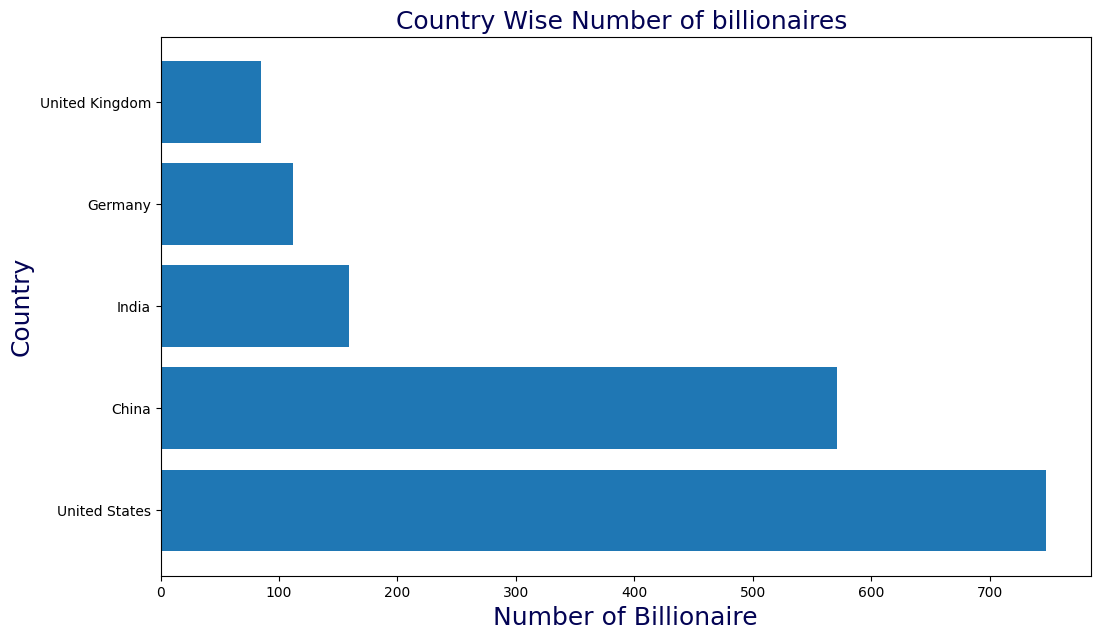

In [77]:
fig=plt.figure(figsize=(12,7))
plt.barh(country_wise_no.index[0:5],country_wise_no[0:5])
plt.title("Country Wise Number of billionaires ", fontsize = 18,color='#030354')
plt.ylabel("Country",color='#030354',fontsize=18)
plt.xlabel("Number of Billionaire",color='#030354',fontsize=18)
plt.show()


### *Top ten industries that made highest number of billionaires.*

In [78]:
df1['category'].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [79]:
df1['category'].nunique()


18

In [80]:
category_wise=df1['category'].value_counts()
category_wise


category
Finance & Investments         392
Technology                    343
Manufacturing                 337
Fashion & Retail              250
Healthcare                    217
Food & Beverage               203
Real Estate                   193
Diversified                   180
Media & Entertainment          99
Energy                         95
Automotive                     70
Metals & Mining                68
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      35
Sports                         27
Gambling & Casinos             23
Name: count, dtype: int64

In [81]:
labels=category_wise[0:10].index
print(labels)



Index(['Finance & Investments', 'Technology', 'Manufacturing',
       'Fashion & Retail', 'Healthcare', 'Food & Beverage', 'Real Estate',
       'Diversified', 'Media & Entertainment', 'Energy'],
      dtype='object', name='category')


In [82]:
explode=[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

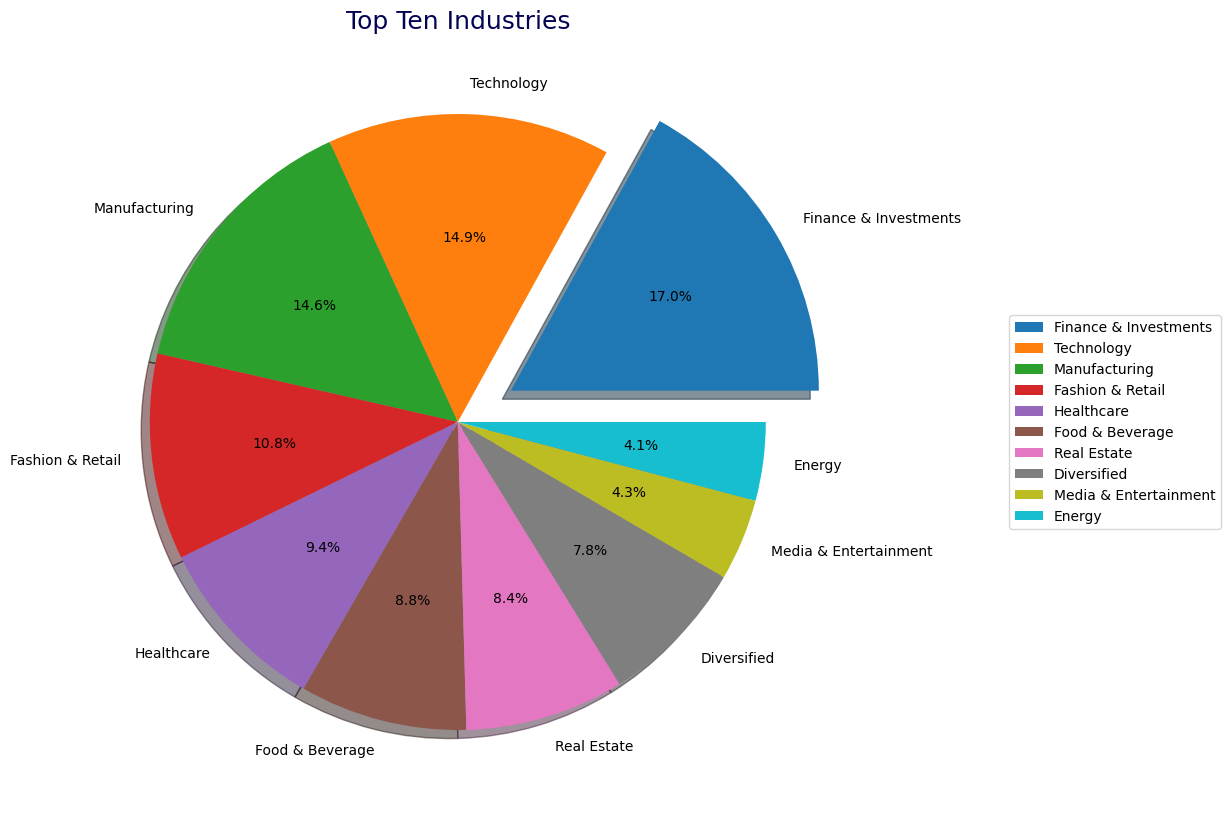

In [83]:
fig=plt.figure(figsize=(14,10))
plt.pie(category_wise[0:10],labels=labels,autopct="%0.1f%%",explode=explode,shadow=True)
plt.legend(labels=labels,loc='right',bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Top Ten Industries",fontsize = 18,color='#030354')
plt.show()


### *Gender wise distribution of billionaires*

In [84]:
df1['gender'].isnull().sum()

16

In [85]:
gender_wise=df1['gender'].value_counts()
labels=['Male','Female']


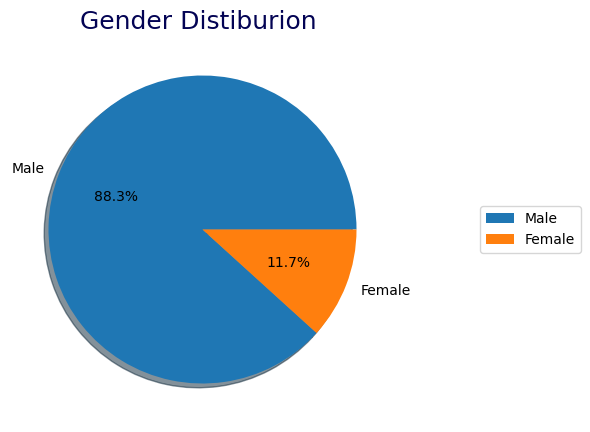

In [86]:
fig=plt.figure(figsize=(7,5))
plt.pie(gender_wise[0:10],labels=labels,autopct="%0.1f%%",shadow=True)
plt.legend(labels=labels,loc='right',bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Gender Distiburion ",fontsize = 18,color='#030354')
plt.show()

### **Top Ten Indian Billionaires**

In [87]:
df['country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', nan, 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Ireland', 'Bermuda',
       'Lebanon', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Ando

In [88]:
df_ind=df[df['country']=="India"]

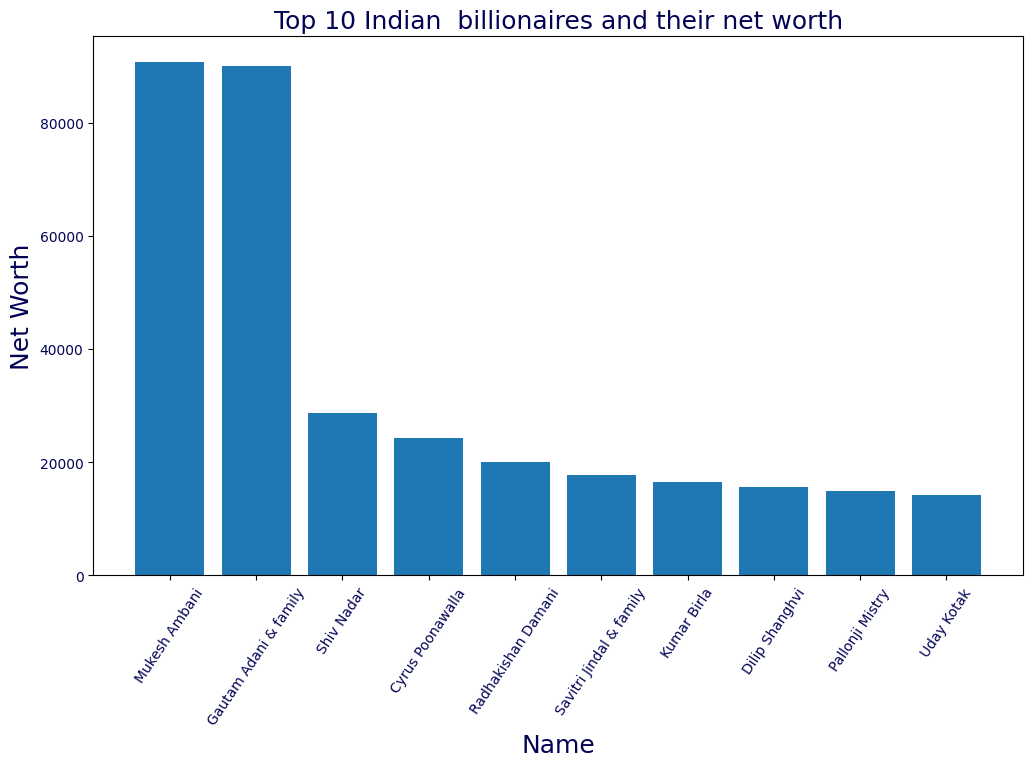

In [135]:
fig=plt.figure(figsize=(12,7))
plt.bar(np.arange(10),df_ind['finalWorth'][0:10])
plt.xticks(np.arange(10),df_ind["personName"][0:10],rotation=56,color='#030354')
plt.xlabel("Name",color='#030354',fontsize=18)
plt.ylabel("Net Worth",color='#030354',fontsize=18)
plt.yticks(color='#030354')
plt.title("Top 10 Indian  billionaires and their net worth", fontsize = 18,color='#030354')
plt.show()


### *Age Distribution of Billionaires*

In [90]:
df1['age'].isnull().sum()

86

In [91]:
df1['age'].describe()

count    2582.000000
mean       64.210689
std        13.401258
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: age, dtype: float64

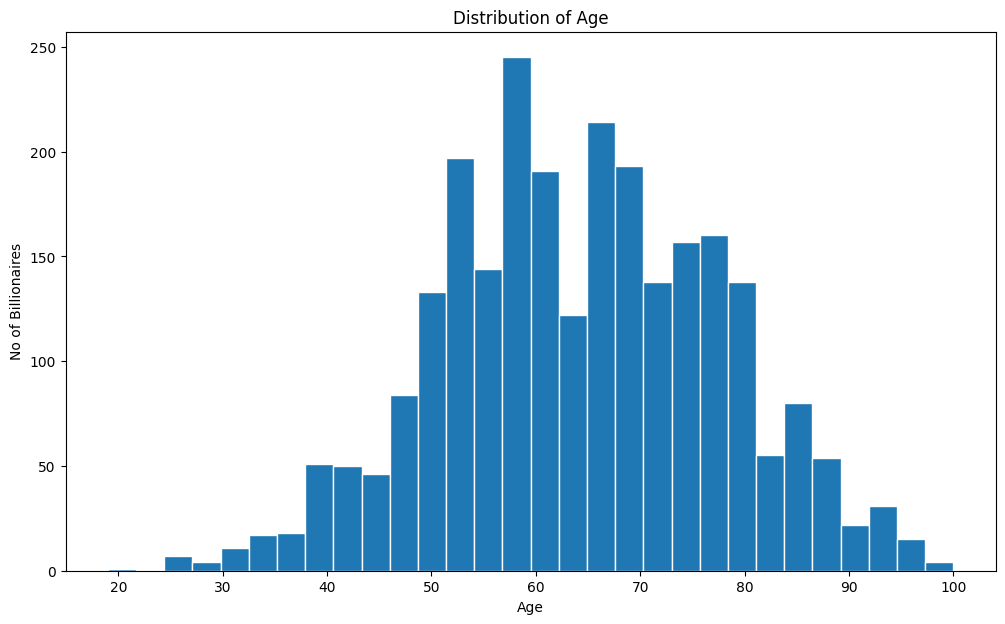

In [92]:
fig=plt.figure(figsize=(12,7))
plt.hist(df1['age'],bins=30,edgecolor="white")
plt.xlabel("Age")
plt.ylabel("No of Billionaires")
plt.title("Distribution of Age")
plt.show()

In [107]:
df1['age']=df1['age'].fillna("60")

In [108]:
df1['age'].isnull().sum()

0

### **Top Five Young Billionaires and their Net Worth**

In [147]:
df_young_bill= df1.sort_values(by=['age','finalWorth'],ascending=[True,True])
# Combine names and corrected ages for the x-axis
x_labels = [f"{name}\n({age} yrs)" for name, age in zip(df_young_bill["personName"][0:5], df_young_bill["age"][0:5])]

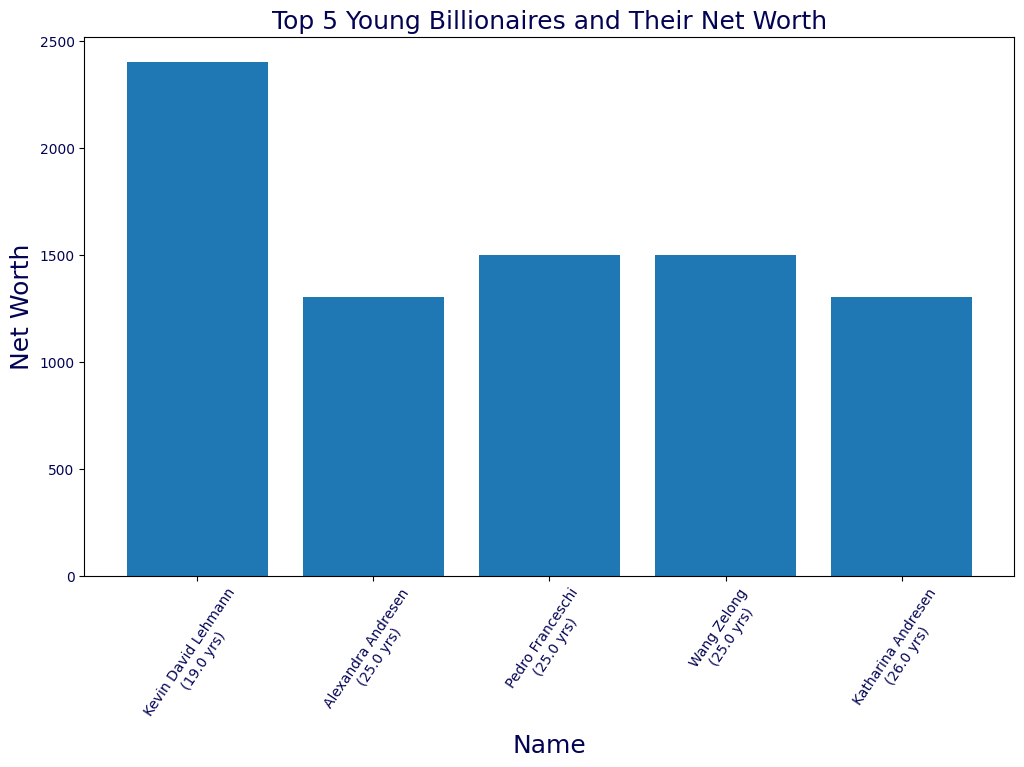

In [148]:
fig=plt.figure(figsize=(12,7))
plt.bar(np.arange(5), df_young_bill['finalWorth'][0:5])
plt.xticks(np.arange(5), x_labels, rotation=56, color='#030354')
plt.xlabel("Name", color='#030354', fontsize=18)
plt.ylabel("Net Worth", color='#030354', fontsize=18)
plt.yticks(color='#030354')
plt.title("Top 5 Young Billionaires and Their Net Worth", fontsize=18, color='#030354')
plt.show()

### *Find Relationship between Age and Networth*

In [152]:
df1['age'].isnull().sum()

0

In [153]:
df1['finalWorth'].isnull().sum()

0

In [173]:
df2 =  df1.sort_values(by=['age'],ascending=[True])

TypeError: '<' not supported between instances of 'float' and 'str'

In [163]:
ages_series = pd.Series(ages)

In [165]:
labels = ["20-30", "31-40", "41-50","51-60","61-70","71-80","81-90","91-100"]

In [166]:
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=labels)

# Group by age group and calculate average net worth
grouped = df1.groupby('age_group')['finalWorth'].mean()

print(grouped)

# Bar plot of average net worth by age group
grouped.plot(kind='bar', color='#5A9', edgecolor='k')
plt.xlabel("Age Group", fontsize=14, color='#030354')
plt.ylabel("Average Net Worth", fontsize=14, color='#030354')
plt.title("Average Net Worth by Age Group", fontsize=16, color='#030354')
plt.show()

ValueError: bins must increase monotonically.